In [23]:
import numpy as np
import tensorflow as tf

from data import load_data_tt, prepare_data_natural
from model import (
    simple_model,
    get_train,
    get_val,
    prepare_data_reweighter,
    prepare_data_refiner,
    apply_reweighter,
    apply_refiner,
    resample,
)
from plotting import plot_n, plot_n_ratio, plot_w, plot_w2, plot_training


bins=np.arange(0, 3.2, 0.2)
transform=lambda x: x[:, 0]

In [2]:
data = pos, neg, pos_weights, neg_weights = load_data_tt()

Epoch 1/5
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 30s 1ms/step - accuracy: 0.4998 - loss: 0.4901 - val_accuracy: 0.4998 - val_loss: 0.4894
Epoch 2/5
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 29s 1ms/step - accuracy: 0.5002 - loss: 0.4895 - val_accuracy: 0.4998 - val_loss: 0.4894
Epoch 3/5
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 29s 1ms/step - accuracy: 0.5002 - loss: 0.4895 - val_accuracy: 0.4998 - val_loss: 0.4894
Epoch 4/5
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 30s 1ms/step - accuracy: 0.5000 - loss: 0.4900 - val_accuracy: 0.4998 - val_loss: 0.4894
Epoch 5/5
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 29s 1ms/step - accuracy: 0.5002 - loss: 0.4895 - val_accuracy: 0.4998 - val_loss: 0.4894


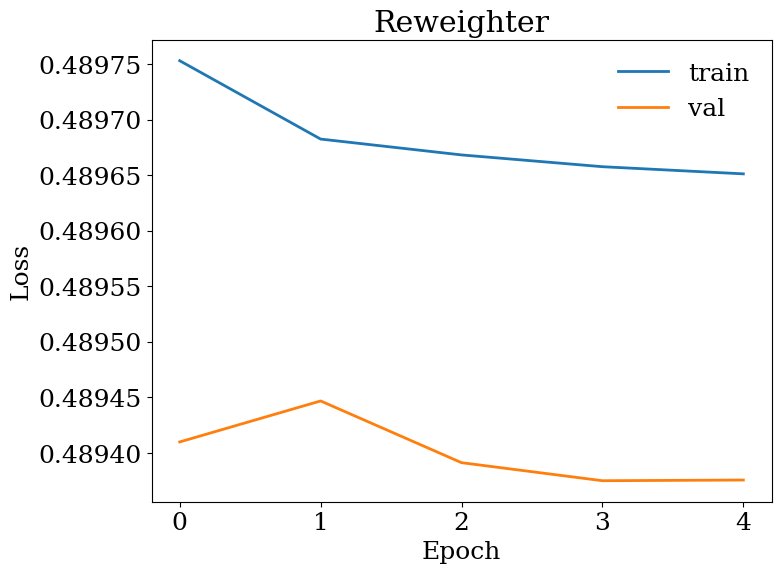

In [3]:
reweighter = simple_model(input_shape=(5,))
reweighter.compile(optimizer="adam", loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), metrics=["accuracy"])
x_train, y_train, w_train, = get_train(*prepare_data_reweighter(*data))
history_reweighter = reweighter.fit(x_train, y_train, sample_weight=w_train, epochs=5, validation_split=0.2, batch_size=256)
plot_training(history_reweighter, title="Reweighter")

Epoch 1/5
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.7612 - loss: 0.5507 - val_accuracy: 0.7608 - val_loss: 0.5501
Epoch 2/5
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.7614 - loss: 0.5495 - val_accuracy: 0.7608 - val_loss: 0.5501
Epoch 3/5
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.7611 - loss: 0.5499 - val_accuracy: 0.7608 - val_loss: 0.5501
Epoch 4/5
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.7616 - loss: 0.5492 - val_accuracy: 0.7608 - val_loss: 0.5501
Epoch 5/5
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.7616 - loss: 0.5492 - val_accuracy: 0.7608 - val_loss: 0.5501


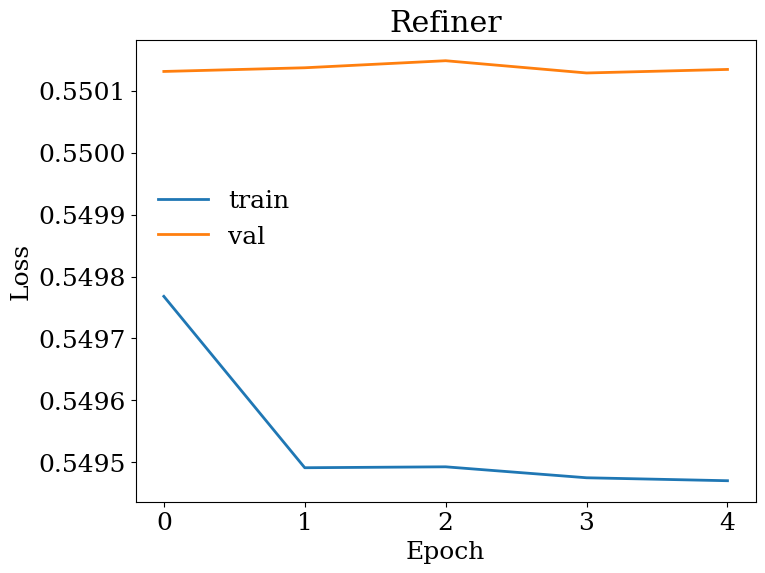

In [4]:
refiner = simple_model(input_shape=(5,))
refiner.compile(optimizer="adam", loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), metrics=["accuracy"])
x_train, y_train, w_train = get_train(*prepare_data_refiner(*data))
history_refiner = refiner.fit(x_train, y_train, sample_weight=w_train, epochs=5, validation_split=0.2, batch_size=256)
plot_training(history_refiner, title="Refiner")

In [5]:
data_natural = get_val(*prepare_data_natural(*data))
data_reweighter = get_val(*apply_reweighter(*data, reweighter=reweighter))
data_refiner = get_val(*apply_refiner(*data, refiner=refiner))

500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


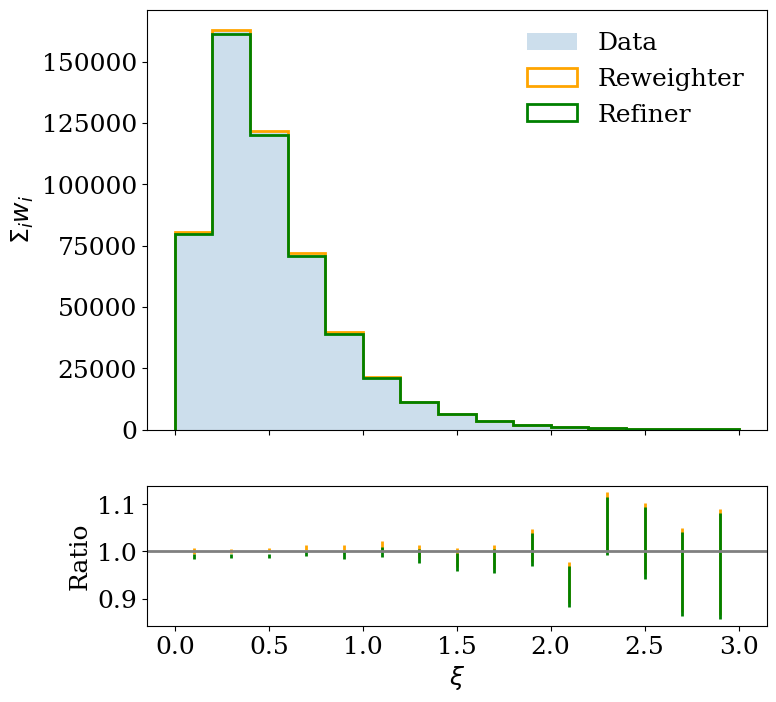

In [24]:
plot_n_ratio(data=data_natural, reweighter=data_reweighter, refiner=data_refiner, bins=bins, transform=transform)

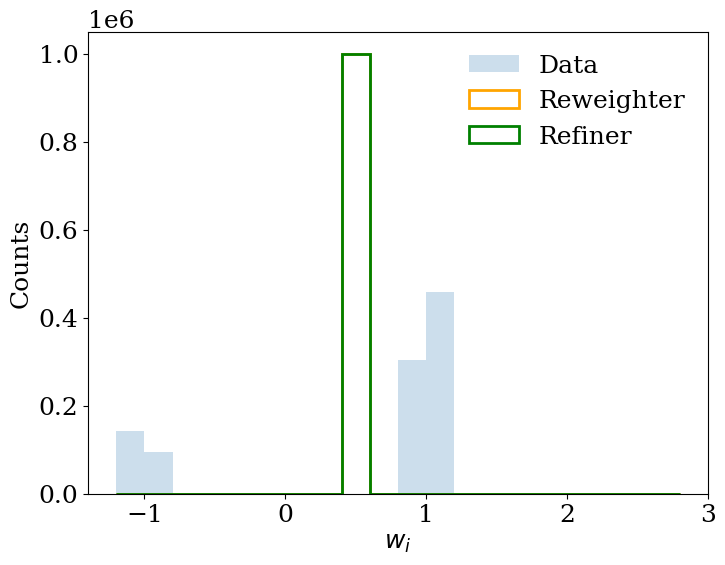

In [7]:
plot_w(data=data_natural, reweighter=data_reweighter, refiner=data_refiner, bins=np.arange(-1.2, 3.0, 0.2))

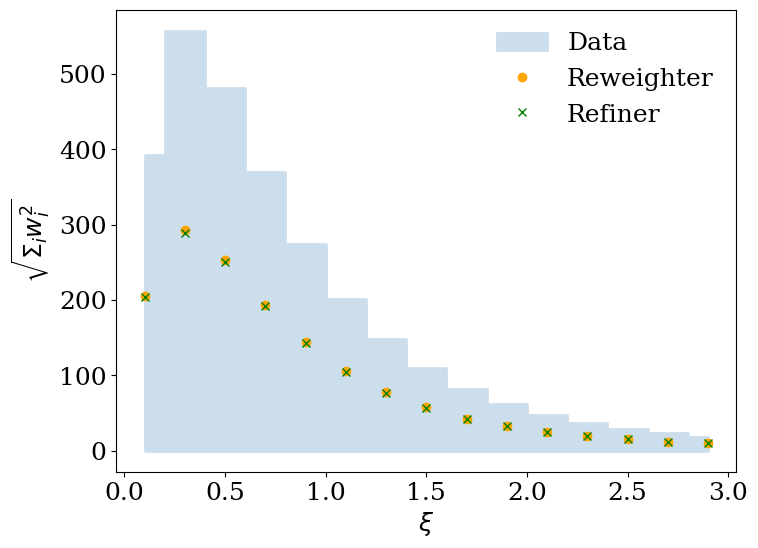

In [8]:
plot_w2(data=data_natural, reweighter=data_reweighter, refiner=data_refiner, bins=bins, transform=transform)

In [9]:
data_reweighter_resampled = resample(*data_reweighter)
data_refiner_resampled = resample(*data_refiner)
len(data_reweighter_resampled[0]), len(data_refiner_resampled[0])

(274627, 268875)

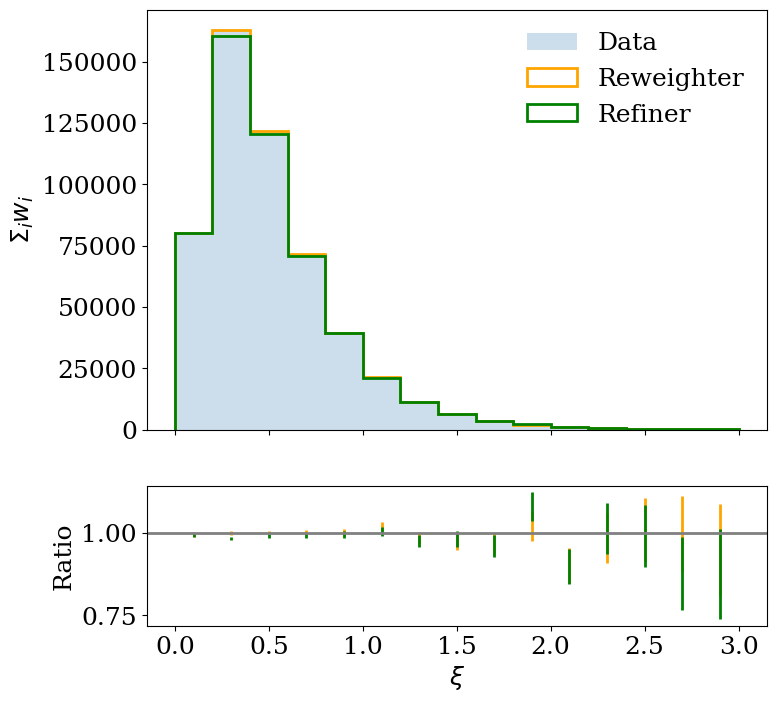

In [10]:
plot_n_ratio(data=data_natural, reweighter=data_reweighter_resampled, refiner=data_refiner_resampled, bins=bins, transform=transform)

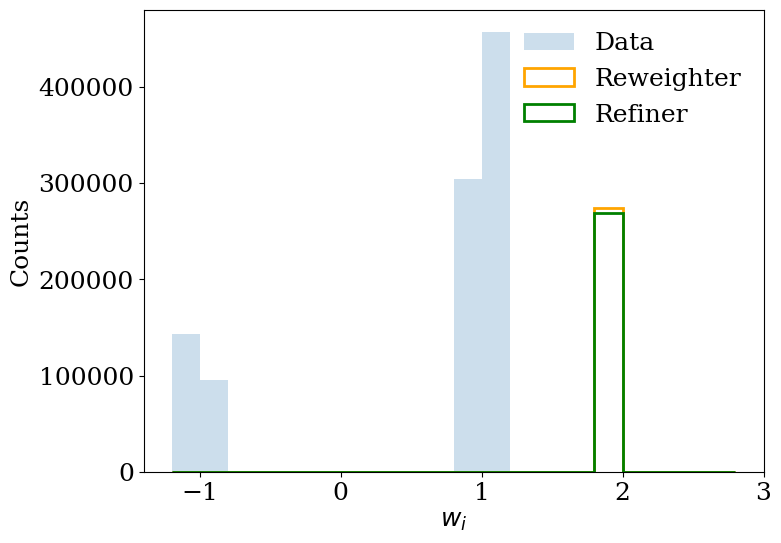

In [11]:
plot_w(data=data_natural, reweighter=data_reweighter_resampled, refiner=data_refiner_resampled, bins=np.arange(-1.2, 3.0, 0.2))

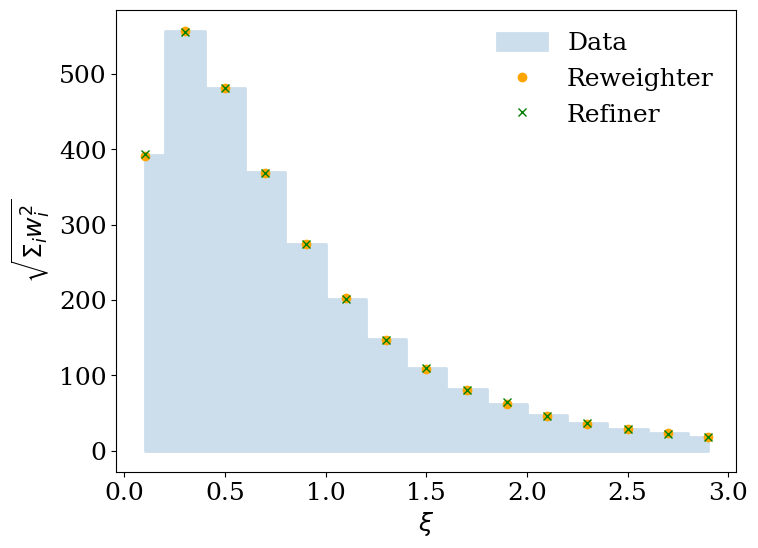

In [12]:
plot_w2(data=data_natural, reweighter=data_reweighter_resampled, refiner=data_refiner_resampled, bins=bins, transform=transform)